In [25]:
pip install pikepdf

  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [30]:
import os
import docx
import PyPDF2
import io 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import pandas as pd
import pdfplumber
import pikepdf



[nltk_data] Downloading package stopwords to C:\Users\Mallikarjuna
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Mallikarjuna
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:

# Function to extract text from resume
def getText(filename):
      
    # Create empty string 
    fullText = ''
    if filename.endswith('.docx'):
        doc = docx.Document(filename)
        
        for para in doc.paragraphs:
            fullText = fullText + para.text
            
           
    elif filename.endswith('.pdf'):  
        with open(filename, "rb") as pdf_file:
            pdoc = PyPDF2.PdfFileReader(filename)
            number_of_pages = pdoc.getNumPages()
            page = pdoc.pages[0]
            page_content = page.extractText()
             
        for paragraph in page_content:
            fullText =  fullText + paragraph
            
    else:
        try:
            import aspose.words as aw
            output = aw.Document()
        # Remove all content from the destination document before appending.
            output.remove_all_children()
            input = aw.Document(filename)
        # Append the source document to the end of the destination document.
            output.append_document(input, aw.ImportFormatMode.KEEP_SOURCE_FORMATTING)
            output.save("Output.docx");
            doc = docx.Document('Output.docx')
        
            for para in doc.paragraphs:
                fullText = fullText + para.text
            fullText = fullText[79:]
        except:
            filename.endswith(".zip")
         
    return (fullText)


In [44]:
# Function to remove punctuation and tokenize the text
def tokenText(extText):
   
    # Remove punctuation marks
    punc = '''!()-[]{};:'"\,.<>/?@#$%^&*_~'''
    puncText=" "
    for ele in extText:
        if ele in punc:
            puncText= extText.replace(ele, "")
            #print(puncText)
    # Tokenize the text and remove stop words
    stop_words = set(stopwords.words('english'))
    puncText.split()
    word_tokens = word_tokenize(puncText)
    TokenizedText = [w for w in word_tokens if not w.lower() in stop_words]
    TokenizedText = []
  
    for w in word_tokens:
        if w not in stop_words:
            TokenizedText.append(w)
    return(TokenizedText)

In [45]:
# Define key terms dictionary for fixing Role Applied for 
terms = {'WorkDay ERP':['workday', 'workday consultant', 'workday hcm', 'eib', 'picof', 
                        'workday studio','nnbound/outbound integrations'],
         'Peoplesoft':['peoplesoft', 'pia','ccb','birt','peci','ccw','pum','people tools',
                        'peoplesoft implementation','peoplesoft components',
                        'peoplesoft dba','peoplesoft admin','peoplesoft admin/dba','peopleSoft fscm', 
                        'peopletoolsupgrade','peopletools upgrade','process scheduler servers',
                        'peoplesoft hrms','peopleSoft consultant','peoplesoft cloud',
                        'PeopleSoft migrations','eoplesoft Testing Framework','pure internet architecture'],             
         'Database Developer':['sql','sql server', 'ms sql server','msbi', 'sql developer', 'ssis','ssrs',
                        'ssms','t-sql','tsql','Razorsql', 'razor sql','triggers','powerbi','power bi',
                        'oracle sql', 'pl/sql', 'pl\sql','oracle', 'oracle 11g','oledb','cte','ddl',
                        'dml','etl','mariadb','maria db'],
         'Java Developer':['reactjs', 'react js', 'react js developer', 'html', 'React JS'
                        'css3','xml','javascript','html5','boostrap','jquery', 'redux','php', 'node js',
                        'nodejs','apache','netbeans','nestjs','nest js','react developer','react hooks',
                        'jenkins']}

In [46]:
# List of all key terms to indicate skillset. Include all the key words in the list 
allTerms = ['workday', 'hcm', 'eib', 'picof','workday hcm',
                        'workday studio','nnbound/outbound integrations',
                        'peoplesoft', 'pia','ccb','birt','peci','ccw','pum','people tools',
                        'peoplesoft implementation','peoplesoft components',
                        'peoplesoft dba','peoplesoft admin','peoplesoft admin/dba','peopleSoft fscm', 
                        'peopletoolsupgrade','peopletools upgrade','process scheduler servers',
                        'peoplesoft hrms','peopleSoft consultant','peopledoft cloud',
                        'PeopleSoft migrations','eoplesoft Testing Framework','pure internet architecture',
                        'sql','sql server', 'ms sql server','msbi', 'sql developer', 'ssis','ssrs',
                        'ssms','t-sql','tsql','Razorsql', 'razor sql','triggers','powerbi','power bi',
                        'oracle sql', 'pl/sql', 'pl\sql','oracle', 'oracle 11g','oledb','cte','ddl',
                        'dml','etl','mariadb','maria db','reactjs', 'react js', 'react js developer', 'html', 
                        'css3','xml','javascript','html5','boostrap','jquery', 'redux','php', 'node js',
                        'nodejs','apache','netbeans','nestjs','nest js','react developer','react hooks',
                        'jenkins']

In [47]:
# Function to read the tokenized text and search for the key words to dermine the Role Applied for
def roleApplied (Text):
    
    # covert the text to lower case
    for i in range(len(Text)):
        Text[i] = Text[i].lower()
    
    # Obtain the scores for each area
    for area in terms.keys():
        if area == 'WorkDay ERP':
            for word in terms[area]:
                if word in Text:
                    role = area
                    return (role)
                
        elif area == 'Peoplesoft':
            for word in terms[area]:
                if word in Text:
                    role = area
                    return(role)   
                
        elif area == 'Database Developer':
            for word in terms[area]:
                if word in Text:
                    role =  area
                    return(role)
            
        elif area == 'Java Developer':
             for word in terms[area]:
                if word in Text:
                    role = area
                    return(role)
        else:
            role = "Fresher"
            return(role)
   # return(role)
                    

In [48]:
# Function to extract Name and contact details
def contactDetails(Text):
    name = ''  
    for i in range(0,3):
        name = " ".join([name,Text[i]])
    return(name)

In [49]:
# Function to extract experience details
def expDetails(Text):
    global sent
   
    Text = Text.split()
   
    for i in range(len(Text)-2):
        Text[i].lower()
        
        if Text[i] ==  'years':
            sent =  Text[i-2] + ' ' + Text[i-1] +' ' + Text[i] +' '+ Text[i+1] +' ' + Text[i+2]
            return (sent)
    
            

In [50]:
# Function to extract skill set details
def skillSet(Text):
    t = []
    for i in range(len(Text)):
        if Text[i] in allTerms:
            if Text[i] in t:
                continue
            t.append(Text[i]) 
    return(t)

In [53]:
# Create an empty Data Frame ResumeText with two columns
ResumeText = pd.DataFrame([], columns=['Name','RoleApplied', 'Experience', 'SkillSet','TextInfo'])

# Mention the path in your computer where resumes folder is stored
path = r"C:\Users\adilsha\Downloads\Resumes"
text =[]

# Search the directory path and loop through the resume documents and callthe function getText
for filename in os.listdir(path):
    filename = os.path.join(path, filename)
    extText = getText(filename)
    #print(type(extText))
    tokText = tokenText(extText)
    #print(extText)
    role = roleApplied(tokText)
    Name = contactDetails(tokText)
    experience = expDetails(extText)
    skills = skillSet(tokText)
    NewRow = [Name,role,experience, skills,tokText]  
    ResumeText.loc[len(ResumeText)] = NewRow

In [11]:
ResumeText.head(80)

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, location, :, gac..."
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat..."
4,gopi krishna reddy,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[gopi, krishna, reddy, professional, summery, ..."
...,...,...,...,...,...
74,kumar ssworkday |,WorkDay ERP,Summary:Having 6+ years of experience,"[hcm, workday, eib, xml, peci, peoplesoft]","[kumar, ssworkday, |, hcm, |, fcmworkday, cons..."
75,tatikonda kiran kumarcareer,Database Developer,with 3.2 years of total,"[sql, cte, t-sql, triggers]","[tatikonda, kiran, kumarcareer, objective, a, ..."
76,venkateswarlu.bworkday consultant having,WorkDay ERP,Having 5.3 years of experience,"[workday, hcm, birt, eib, xml]","[venkateswarlu.bworkday, consultant, having, 5..."
77,vinay kumar v,WorkDay ERP,Having 4.2 years of Total,"[workday, hcm, eib, xml, peoplesoft]","[vinay, kumar, v, workday, functional, consult..."


In [15]:
ResumeText.shape

(79, 5)

In [119]:
pd.set_option('display.max_rows', None)
ResumeText.Experience.str.extract("(\d.\d+|\d+)")

,0
0,2.4
1,4
2,2.11
3,5.1
4,3
5,6.10
6,5.2
7,3.5
8,2
9,NaN


In [16]:
ResumeText[ResumeText['RoleApplied'].isna()]

,Name,RoleApplied,Experience,SkillSet,TextInfo
59,anjani priyadarshini react,None,developer 9 years of experienceThis,[],"[anjani, priyadarshini, react, js, developer, ..."
61,venkatalakshmi pedireddy software,None,ReactJSExperience 3 years in React,[],"[venkatalakshmi, pedireddy, software, develope..."


In [17]:
ResumeText[ResumeText['Name'].isna()]

,Name,RoleApplied,Experience,SkillSet,TextInfo


In [18]:
ResumeText[ResumeText['SkillSet'].isna()]

,Name,RoleApplied,Experience,SkillSet,TextInfo


In [19]:
ResumeText[ResumeText['TextInfo'].isna()]

,Name,RoleApplied,Experience,SkillSet,TextInfo


In [20]:
ResumeText['RoleApplied'].value_counts()

WorkDay ERP           21
Peoplesoft            20
Database Developer    19
Java Developer        17
Name: RoleApplied, dtype: int64

(array([1., 0., 0., 0., 0., 1., 0., 1., 0., 1.]),
 array([17. , 17.4, 17.8, 18.2, 18.6, 19. , 19.4, 19.8, 20.2, 20.6, 21. ]),
 <BarContainer object of 10 artists>)

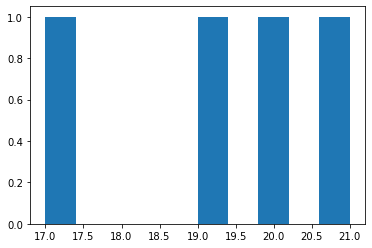

In [21]:
import matplotlib.pyplot as plt
plt.hist(ResumeText['RoleApplied'].value_counts())

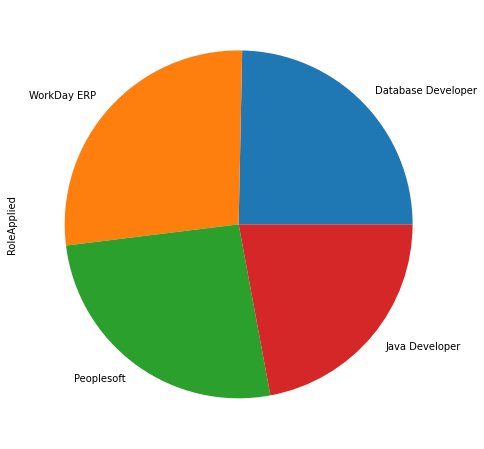

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
ResumeText['RoleApplied'].value_counts(sort=False).plot.pie()
plt.show()

In [23]:
emptyseries = pd.isnull(ResumeText["RoleApplied"])
#emptyseries.dtype
ResumeText[emptyseries]

,Name,RoleApplied,Experience,SkillSet,TextInfo
59,anjani priyadarshini react,None,developer 9 years of experienceThis,[],"[anjani, priyadarshini, react, js, developer, ..."
61,venkatalakshmi pedireddy software,None,ReactJSExperience 3 years in React,[],"[venkatalakshmi, pedireddy, software, develope..."


In [24]:
emptyseries = pd.isnull(ResumeText['Experience'])
#emptyseries.dtype
ResumeText[emptyseries]

,Name,RoleApplied,Experience,SkillSet,TextInfo
9,ravali p curriculum,Database Developer,None,[sql],"[ravali, p, curriculum, vitae, specialization,..."
10,susovan bag seeking,Database Developer,None,"[html, sql]","[susovan, bag, seeking, challenging, position,..."
40,priyanka l sql,Database Developer,None,"[sql, ddl, dml, cte, t-sql, triggers, ssis]","[priyanka, l, sql, server, developerprofession..."
49,haripriya battina experience,Database Developer,None,"[reactjs, javascript, html, sql]","[haripriya, battina, experience, ui, developer..."
62,kambala sai surendra,Java Developer,None,"[redux, html, jquery, javascript]","[kambala, sai, surendra, mandepeta, summary, p..."
65,md khizaruddin rauf,Java Developer,None,"[html, redux, javascript]","[md, khizaruddin, rauf, experience, ⇨currently..."


In [25]:
sqldeveloper = (ResumeText["RoleApplied"] == "Java Developer")
ResumeText[sqldeveloper]                           

,Name,RoleApplied,Experience,SkillSet,TextInfo
48,kanumuru deepak reddycareer,Java Developer,of 2 years from MetroLabs,"[html5, css3, javascript, html, redux, reactjs]","[kanumuru, deepak, reddycareer, objective, :, ..."
50,kamalakar reddy .,Java Developer,● 3 years of experience,"[html5, css3, javascript, redux, html, reactjs...","[kamalakar, reddy, ., a, linked, in, https//ww..."
53,pragnya pattnaik expertise,Java Developer,around 2 years of experience,"[html5, css3, javascript, jquery]","[pragnya, pattnaik, expertise, :, having, arou..."
54,"sarala madasu204 ,",Java Developer,"layout,nizampet,Hyderabad,500090.Having 3 year...","[javascript, html5, css3, html]","[sarala, madasu204, ,, sri, geethika, prestig..."
55,thirupathamma ballasummary:28 years,Java Developer,Thirupathamma BallaSUMMARY:2.8 years of IT,[javascript],"[thirupathamma, ballasummary:28, years, it, ex..."
56,maryala vinay reddyprofessional,Java Developer,Having 2 years of successful,"[reactjs, javascript, html5, css3, html, redux]","[maryala, vinay, reddyprofessional, summary, :..."
57,ui-developer/ react js,Java Developer,all 3.2 years of Extensive,"[html, xml, javascript, redux, html5, css3, no...","[ui-developer/, react, js, developer, name, :,..."
58,ui-developer/ react js,Java Developer,all 3.2 years of Extensive,"[html, xml, javascript, redux, html5, css3, no...","[ui-developer/, react, js, developer, name, :,..."
60,kotani durga prasadobjective,Java Developer,flexible.Professional Summary:3.1 years of exp...,"[html, html5, css3, javascript, jquery]","[kotani, durga, prasadobjective, :, aspirant, ..."
62,kambala sai surendra,Java Developer,None,"[redux, html, jquery, javascript]","[kambala, sai, surendra, mandepeta, summary, p..."


In [26]:
ResumeText

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, location, :, gac..."
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat..."
4,gopi krishna reddy,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[gopi, krishna, reddy, professional, summery, ..."
...,...,...,...,...,...
74,kumar ssworkday |,WorkDay ERP,Summary:Having 6+ years of experience,"[hcm, workday, eib, xml, peci, peoplesoft]","[kumar, ssworkday, |, hcm, |, fcmworkday, cons..."
75,tatikonda kiran kumarcareer,Database Developer,with 3.2 years of total,"[sql, cte, t-sql, triggers]","[tatikonda, kiran, kumarcareer, objective, a, ..."
76,venkateswarlu.bworkday consultant having,WorkDay ERP,Having 5.3 years of experience,"[workday, hcm, birt, eib, xml]","[venkateswarlu.bworkday, consultant, having, 5..."
77,vinay kumar v,WorkDay ERP,Having 4.2 years of Total,"[workday, hcm, eib, xml, peoplesoft]","[vinay, kumar, v, workday, functional, consult..."


In [27]:
ResumeText

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, location, :, gac..."
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat..."
4,gopi krishna reddy,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[gopi, krishna, reddy, professional, summery, ..."
...,...,...,...,...,...
74,kumar ssworkday |,WorkDay ERP,Summary:Having 6+ years of experience,"[hcm, workday, eib, xml, peci, peoplesoft]","[kumar, ssworkday, |, hcm, |, fcmworkday, cons..."
75,tatikonda kiran kumarcareer,Database Developer,with 3.2 years of total,"[sql, cte, t-sql, triggers]","[tatikonda, kiran, kumarcareer, objective, a, ..."
76,venkateswarlu.bworkday consultant having,WorkDay ERP,Having 5.3 years of experience,"[workday, hcm, birt, eib, xml]","[venkateswarlu.bworkday, consultant, having, 5..."
77,vinay kumar v,WorkDay ERP,Having 4.2 years of Total,"[workday, hcm, eib, xml, peoplesoft]","[vinay, kumar, v, workday, functional, consult..."


In [28]:
stopwords=stopwords.words("english")

In [29]:
from nltk.stem.porter import PorterStemmer 
import re

In [30]:
ps=PorterStemmer()

In [31]:
def preprocess(x):
         x=re.sub('[^a-zA-Z ]', ' ', x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[ps.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [32]:
ResumeText.head()

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, location, :, gac..."
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, objective, :, have, 21..."
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat..."
4,gopi krishna reddy,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[gopi, krishna, reddy, professional, summery, ..."


In [33]:
#tem.review=tem.review.apply(lambda x: [ps.stem(word) for word in x])
ResumeText.TextInfo=ResumeText.TextInfo.apply(lambda x: [ps.stem(word) for word in x])

In [34]:
ResumeText.head()

,Name,RoleApplied,Experience,SkillSet,TextInfo
0,anil kumar maddukuri,Database Developer,Developer Summary2.4 years of experience,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...","[anil, kumar, maddukuri, sql, &, msbi, develop..."
1,aradhana tripathi current,Database Developer,than 4 years of working,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]","[aradhana, tripathi, current, locat, :, gachib..."
2,buddha vamsi career,Database Developer,OBJECTIVE:Have 2.11 years of IT,"[sql, oracle, triggers, cte, etl]","[buddha, vamsi, career, object, :, have, 211, ..."
3,chinna subbarayudu mdob,WorkDay ERP,around 5.1 years of IT,"[workday, hcm, etl, eib, xml, ccw, picof, peci...","[chinna, subbarayudu, mdob, 06thmarch, 1994nat..."
4,gopi krishna reddy,WorkDay ERP,with 3+ years as Workday,"[workday, hcm, eib, picof, xml, birt]","[gopi, krishna, reddi, profession, summeri, :,..."


In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lb=preprocessing.LabelEncoder()
ResumeText['role']= lb.fit_transform(ResumeText['RoleApplied'])

In [36]:
df=pd.DataFrame(ResumeText.drop(["Name"],axis=1))
df=df.drop(["RoleApplied"],axis=1)
df=df.drop(["Experience"],axis=1)
df=df.drop(["TextInfo"],axis=1)

In [37]:
df.head()

,SkillSet,role
0,"[sql, msbi, ssms, ssis, ssrs, triggers, cte, e...",0
1,"[sql, mariadb, triggers, ddl, dml, t-sql, ssms]",0
2,"[sql, oracle, triggers, cte, etl]",0
3,"[workday, hcm, etl, eib, xml, ccw, picof, peci...",3
4,"[workday, hcm, eib, picof, xml, birt]",3


In [38]:
# repeat this step for experience
df['SkillSet'] = df['SkillSet'].apply(lambda x: ','.join(map(str, x)))

In [39]:
df.head()

,SkillSet,role
0,"sql,msbi,ssms,ssis,ssrs,triggers,cte,etl,oledb",0
1,"sql,mariadb,triggers,ddl,dml,t-sql,ssms",0
2,"sql,oracle,triggers,cte,etl",0
3,"workday,hcm,etl,eib,xml,ccw,picof,peci,peoples...",3
4,"workday,hcm,eib,picof,xml,birt",3


In [95]:
df.role

0     0
1     0
2     0
3     3
4     3
     ..
74    3
75    0
76    3
77    3
78    0
Name: role, Length: 79, dtype: int32

In [96]:
#tem.review=tem.review.apply(lambda x: " ".join(x))
df.TextInfo=df.SkillSet.apply(lambda x: " ".join(x))

C:\Users\Mallikarjuna Reddy\AppData\Local\Temp\ipykernel_11928\2710824653.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.TextInfo=df.SkillSet.apply(lambda x: " ".join(x))


In [97]:
df.head()

,SkillSet,role
0,"sql,msbi,ssms,ssis,ssrs,triggers,cte,etl,oledb",0
1,"sql,mariadb,triggers,ddl,dml,t-sql,ssms",0
2,"sql,oracle,triggers,cte,etl",0
3,"workday,hcm,etl,eib,xml,ccw,picof,peci,peoples...",3
4,"workday,hcm,eib,picof,xml,birt",3


In [106]:
import numpy as np
a=np.array(df.SkillSet)

In [107]:
from sklearn.feature_extraction.text import CountVectorizer 
  
cv = CountVectorizer()
a = cv.fit_transform(a).toarray() 
a=pd.DataFrame(a,columns=cv.get_feature_names_out())


In [108]:
X = cv.fit_transform(df.TextInfo.values).toarray()  
X=pd.DataFrame(X,columns=cv.get_feature_names())

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [109]:
X.head()

,apache,birt,ccb,ccw,css3,cte,ddl,dml,eib,etl,...,pum,reactjs,redux,sql,ssis,ssms,ssrs,triggers,workday,xml
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,2,0,1,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,1
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [110]:
from sklearn.model_selection import train_test_split 
y=df.role  
# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,) 

In [111]:
X_train.shape,X_test.shape ,y_train.shape ,y_test.shape 

((55, 37), (24, 37), (55,), (24,))

In [112]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
import seaborn as sns
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [114]:
models=[DecisionTreeClassifier(),LogisticRegression(max_iter=100),SVC(),RandomForestClassifier()]
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(str(model),"accuracy ::",metrics.accuracy_score(y_test,y_pred))

DecisionTreeClassifier() accuracy :: 1.0
LogisticRegression() accuracy :: 0.9583333333333334
SVC() accuracy :: 0.9583333333333334
RandomForestClassifier() accuracy :: 0.9583333333333334


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
requiredText = df['SkillSet'].values
requiredTarget = df['role'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit_transform(requiredText).toarray()
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=123, test_size=0.30, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((55, 37), (24, 37))

In [120]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((55, 37), (24, 37), (55,), (24,))

In [121]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [122]:
clf.score(X_train,y_train),clf.score(X_test,y_test)

(0.9636363636363636, 0.9583333333333334)

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [124]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of RandomForestClassifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of RandomForestClassifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of RandomForestClassifier on training set: 1.0000
Accuracy of RandomForestClassifier on test set    : 0.9167


In [125]:
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         1

    accuracy                           0.92        24
   macro avg       0.95      0.92      0.92        24
weighted avg       0.94      0.92      0.91        24




In [126]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print('Accuracy of DecisionTreeClassifier on training set: {:.4f}'.format(dt.score(X_train, y_train)))
print('Accuracy of DecisionTreeClassifier on test set    : {:.4f}'.format(dt.score(X_test, y_test)))

Accuracy of DecisionTreeClassifier on training set: 1.0000
Accuracy of DecisionTreeClassifier on test set    : 0.9583


In [127]:
y_test,dt_pred

(array([3, 2, 0, 1, 0, 1, 3, 2, 0, 2, 2, 0, 3, 2, 1, 3, 4, 3, 0, 2, 3, 0,
        1, 1]),
 array([3, 2, 0, 1, 0, 4, 3, 2, 0, 2, 2, 0, 3, 2, 1, 3, 4, 3, 0, 2, 3, 0,
        1, 1]))

In [128]:
result=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':dt_pred.flatten()})
result.sample(10)

,Actual,Predicted
20,3,3
23,1,1
21,0,0
10,2,2
9,2,2
5,1,4
6,3,3
8,0,0
15,3,3
17,3,3


In [129]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 0.9818
Accuracy of Support Vector Classifier on test set    : 0.8750


In [130]:
log=LogisticRegression()
log.fit(X_train,y_train)
prediction_3= log.predict(X_test)
print('Accuracy of LogisticRegression on training set: {:.4f}'.format(log.score(X_train, y_train)))
print('Accuracy of LogisticRegression on test set    : {:.4f}'.format(log.score(X_test, y_test)))

Accuracy of LogisticRegression on training set: 0.9818
Accuracy of LogisticRegression on test set    : 0.9167


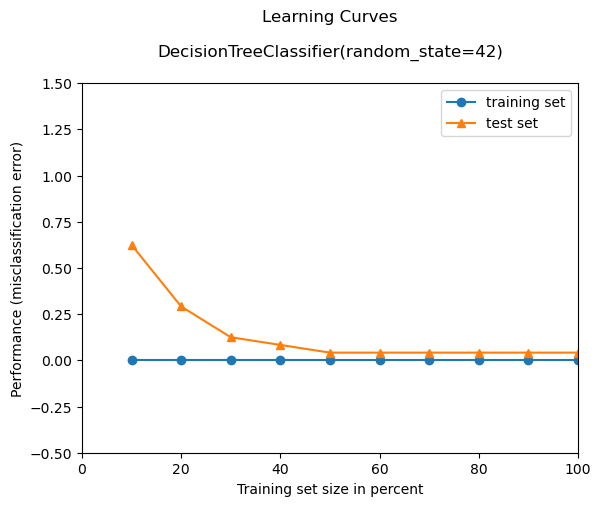

In [131]:
#pip install mlxtend
from mlxtend.plotting import plot_learning_curves
# instantiating the model 
clf = dt
 
# plotting the learning curve
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=clf,
                     scoring="misclassification error",
                     suppress_plot=False,
                     print_model=True)
plt.ylim(top=1.5, bottom=-0.5)
plt.xlim(left=0.0, right=100)
plt.show()

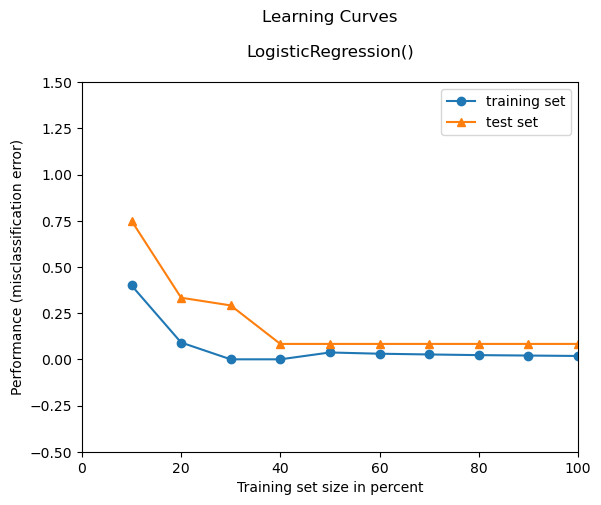

In [132]:
#pip install mlxtend
from mlxtend.plotting import plot_learning_curves
# instantiating the model 
clf = log
 
# plotting the learning curve
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=clf,
                     scoring="misclassification error",
                     suppress_plot=False,
                     print_model=True)
plt.ylim(top=1.5, bottom=-0.5)
plt.xlim(left=0.0, right=100)
plt.show()

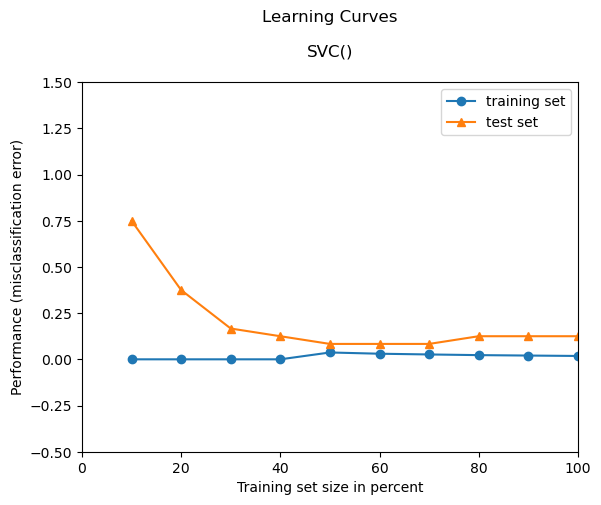

In [133]:
#pip install mlxtend
from mlxtend.plotting import plot_learning_curves
# instantiating the model 
clf = sv_clf
 
# plotting the learning curve
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=clf,
                     scoring="misclassification error",
                     suppress_plot=False,
                     print_model=True)
plt.ylim(top=1.5, bottom=-0.5)
plt.xlim(left=0.0, right=100)
plt.show()

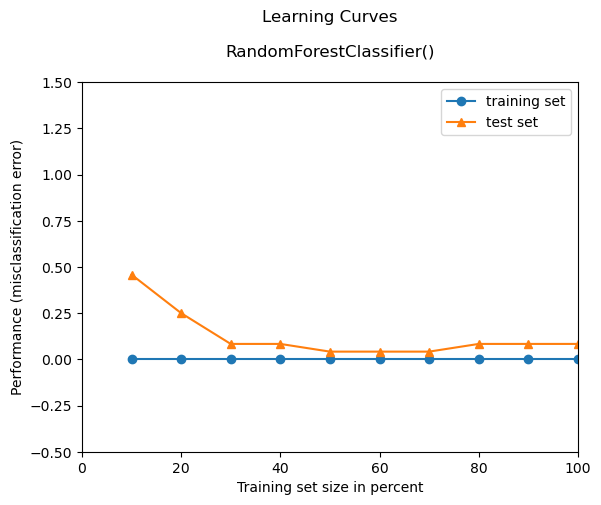

In [134]:
#pip install mlxtend
from mlxtend.plotting import plot_learning_curves
# instantiating the model 
clf = rf_clf
 
# plotting the learning curve
plot_learning_curves(X_train=X_train,
                     y_train=y_train,
                     X_test=X_test,
                     y_test=y_test,
                     clf=clf,
                     scoring="misclassification error",
                     suppress_plot=False,
                     print_model=True)
plt.ylim(top=1.5, bottom=-0.5)
plt.xlim(left=0.0, right=100)
plt.show()

# saving the model

In [135]:
import pickle

In [136]:
filename="Resumeparser.sav"
pickle.dump(dt, open(filename, 'wb'))

In [137]:
from pickle import load

In [138]:
loaded_model=load(open('Resumeparser.sav','rb'))

In [139]:
loaded_model

DecisionTreeClassifier(random_state=42)